# Business Understanding

**Problem** :

**Goal**:

**Null Hypothesis(H0)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

**Alternative hypothesis(H1)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn. 


**Analytical Questions**

Pricing Strategy and Customer Retention:
- How do different levels of monthly customer charges impact customer churn rates? Are there specific price points where churn tends to increase significantly? Can we identify an optimal pricing range that minimizes churn while maximizing revenue?


Service Quality and Customer Satisfaction:
- Is there a correlation between higher monthly charges and improved service quality (e.g., better internet speed, enhanced customer support)?
Do customers who pay more tend to stay longer due to better service experiences?
How can we enhance service quality to retain high-paying customers?


Contract Length and Churn Behavior:
- Are customers on longer-term contracts (e.g., annual contracts) less likely to churn compared to those on month-to-month plans?

- How does the relationship between monthly charges and churn differ based on contract duration? Can we encourage customers to opt for longer contracts to reduce churn?

- Does the amount of time spent being a customer equate to the probability of churning by gender?

- Does one's total charges over the year increase as expected or is there a trend of discount for loyal customers?

### Data Dictionary

| Column Names|Description| Data Type|
|-------------|-----------|----------|
|Gender|Whether the customer is a male or a female|object|
|SeniorCitizen|Whether a customer is a senior citizen or not|int64|
|Partner|Whether the customer has a partner or not (Yes, No)|object|
|Dependents|Whether the customer has dependents or not (Yes, No)|object|
|Tenure|Number of months the customer has stayed with the company|int64|
|Phone Service|Whether the customer has a phone service or not (Yes, No)|object|
|MultipleLines|Whether the customer has multiple lines or not|object|
|InternetService|Customer's internet service provider (DSL, Fiber Optic, No)|object|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No Internet)|object|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No Internet)|object|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|object|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet)|object|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|object|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No Internet service)|object|
|Contract|The contract term of the customer (Month-to-Month, One year, Two year)|object|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|object|
|Payment Method|The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))|object|
|MonthlyCharges|The amount charged to the customer monthly|float64|
|TotalCharges|The total amount charged to the customer|float64|
|Churn|Whether the customer churned or not (Yes or No)|object|


## Data Understanding

In [1]:
#import all necessary libraries

# data manipulation
import pandas as pd
import numpy as np
import missingno

# data visualization libraries
import matplotlib.pyplot as plt
from plotly import express as px
import seaborn as sns

# statistical libraries
from scipy import stats
from sklearn.impute import SimpleImputer
import statistics as stat
from scipy.stats import mannwhitneyu
import phik

# database manipulation libraries
import pyodbc
from dotenv import dotenv_values

# hide warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
 

In [2]:
# load environment variables
environment_variables = dotenv_values(".env")

# load database configurations
database = environment_variables.get("DB_NAME")
server = environment_variables.get("SERVER_NAME")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# database connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [3]:
# create pyodbc connector
connection = pyodbc.connect(connection_string)

In [4]:
# Loading first dataset from MS SQL server
query_one = " SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query_one,connection)
df_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [5]:
# load second dataset
df_2 = pd.read_csv("LP2_Telco-churn-second-2000.csv")
df_2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [6]:
# load third dataset
df_3 = pd.read_excel("Telco-churn-last-2000.xlsx")
df_3.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [109]:
def unique_val_check(df):
    for col in df.columns:
        if ((df[col].dtype == 'object') or (df[col].dtype == 'bool')) and (col != 'customerID'):
            print(col, '----->', df[col].unique())
            print('=' * 80)

In [110]:
unique_val_check(df_1)

gender -----> ['Female' 'Male']
SeniorCitizen -----> [False  True]
Partner -----> [ True False]
Dependents -----> [False  True]
PhoneService -----> [False  True]
MultipleLines -----> [None False True]
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> [False True None]
OnlineBackup -----> [True False None]
DeviceProtection -----> [False True None]
TechSupport -----> [False True None]
StreamingTV -----> [False True None]
StreamingMovies -----> [False True None]
Contract -----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -----> [ True False]
PaymentMethod -----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -----> [False True None]


In [111]:
unique_val_check(df_2)

gender -----> ['Male' 'Female']
Partner -----> ['No' 'Yes']
Dependents -----> ['No' 'Yes']
PhoneService -----> ['Yes' 'No']
MultipleLines -----> ['No' 'No phone service' 'Yes']
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> ['No' 'Yes' 'No internet service']
OnlineBackup -----> ['No' 'Yes' 'No internet service']
DeviceProtection -----> ['No' 'Yes' 'No internet service']
TechSupport -----> ['Yes' 'No' 'No internet service']
StreamingTV -----> ['No' 'Yes' 'No internet service']
StreamingMovies -----> ['No' 'Yes' 'No internet service']
Contract -----> ['Month-to-month' 'Two year' 'One year']
PaperlessBilling -----> ['Yes' 'No']
PaymentMethod -----> ['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
TotalCharges -----> ['312.7' '1046.5' '2960.1' ... '346.45' '306.6' '6844.5']
Churn -----> ['No' 'Yes']


In [13]:
train_df = pd.concat([df_1,df_2])
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [14]:


def modify_column_names(df):

    rename_columns= {
    "customerID":"customerId",
    "StreamingTV":"StreamingTv"
    }
    df=df.rename(columns=rename_columns) 

    modified_columns = []
    for column in df.columns:
        modified_column = ''
        for char in column:
            if char.isupper():
                modified_column += '_' + char
            else:
                modified_column += char
        modified_columns.append(modified_column.lstrip('_'))
    df.columns = modified_columns

    df= df.rename(columns=lambda x: x.lower()) 
    return df



In [15]:

train_df = modify_column_names(train_df)

<Axes: >

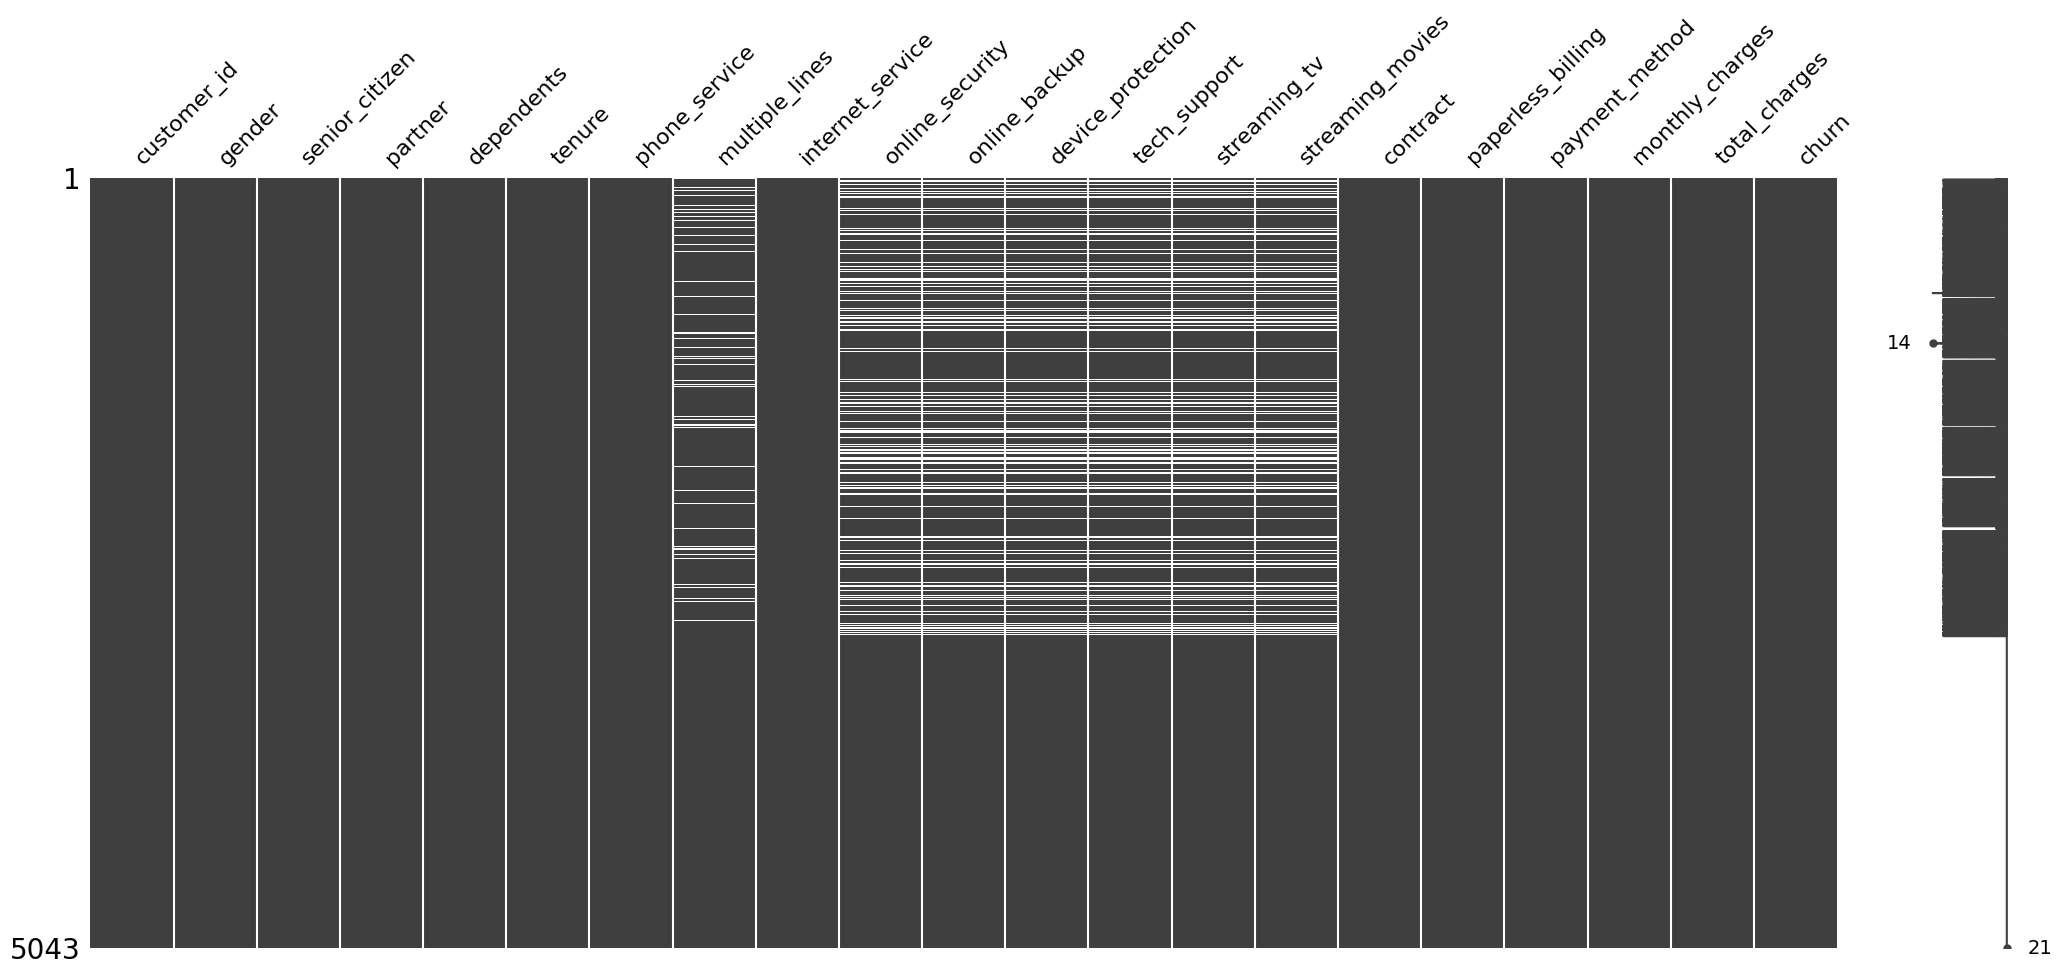

In [16]:
missingno.matrix(train_df)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5043 non-null   object 
 1   gender             5043 non-null   object 
 2   senior_citizen     5043 non-null   int64  
 3   partner            5043 non-null   object 
 4   dependents         5043 non-null   object 
 5   tenure             5043 non-null   int64  
 6   phone_service      5043 non-null   object 
 7   multiple_lines     4774 non-null   object 
 8   internet_service   5043 non-null   object 
 9   online_security    4392 non-null   object 
 10  online_backup      4392 non-null   object 
 11  device_protection  4392 non-null   object 
 12  tech_support       4392 non-null   object 
 13  streaming_tv       4392 non-null   object 
 14  streaming_movies   4392 non-null   object 
 15  contract           5043 non-null   object 
 16  paperless_billing  5043 non-n

In [19]:
# Convert column to numeric with errors='coerce
train_df['total_charges'] = pd.to_numeric(train_df['total_charges'], errors='coerce')

In [115]:
train_df.total_charges.dtype

dtype('float64')

In [21]:
train_df.duplicated().sum()

0

In [22]:
train_df.isnull().sum()

customer_id            0
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  1
dtype: int64

In [23]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthly_charges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
total_charges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

In [24]:

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'totalcharges' column
imputer.fit(train_df[['total_charges']])

# Transform and replace missing values in the 'totalcharges' column with the median
train_df['total_charges'] = imputer.transform(train_df[['total_charges']])

# Alternatively, you can use the fit_transform method in one step
# train_df['totalcharges'] = imputer.fit_transform(train_df[['totalcharges']])


In [25]:
train_df.isnull().sum()

customer_id            0
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          0
churn                  1
dtype: int64

In [26]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'multiple_lines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'online_security': {True: 'Yes', False: 'No', None: 'No internet service'},
    'online_backup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'device_protection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'tech_support': {True: 'Yes', False: 'No', None: 'No internet service'},
    'streaming_tv': {True: 'Yes', False: 'No', None: 'No internet service'},
    'streaming_movies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'churn': {True: 'Yes', False: 'No', None: 'No'},
    'partner': {True: 'Yes', False: 'No'},
    'dependents': {True: 'Yes', False: 'No'},
    'paperless_billing': {True: 'Yes', False: 'No'},
    'phone_service': {True: 'Yes', False: 'No'},
}

In [27]:
# Replace old categories with te new ones
train_df.replace(new_cat_values_mapping, inplace=True)

In [28]:
train_df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [133]:
train_df.to_csv('Customer_churn_train_data.csv')

### Univariate Analysis

Univariate analysis in this case study includes histograms, density plots, bar plots and count plots of features in the train data.

*Histogram of numeric columns*

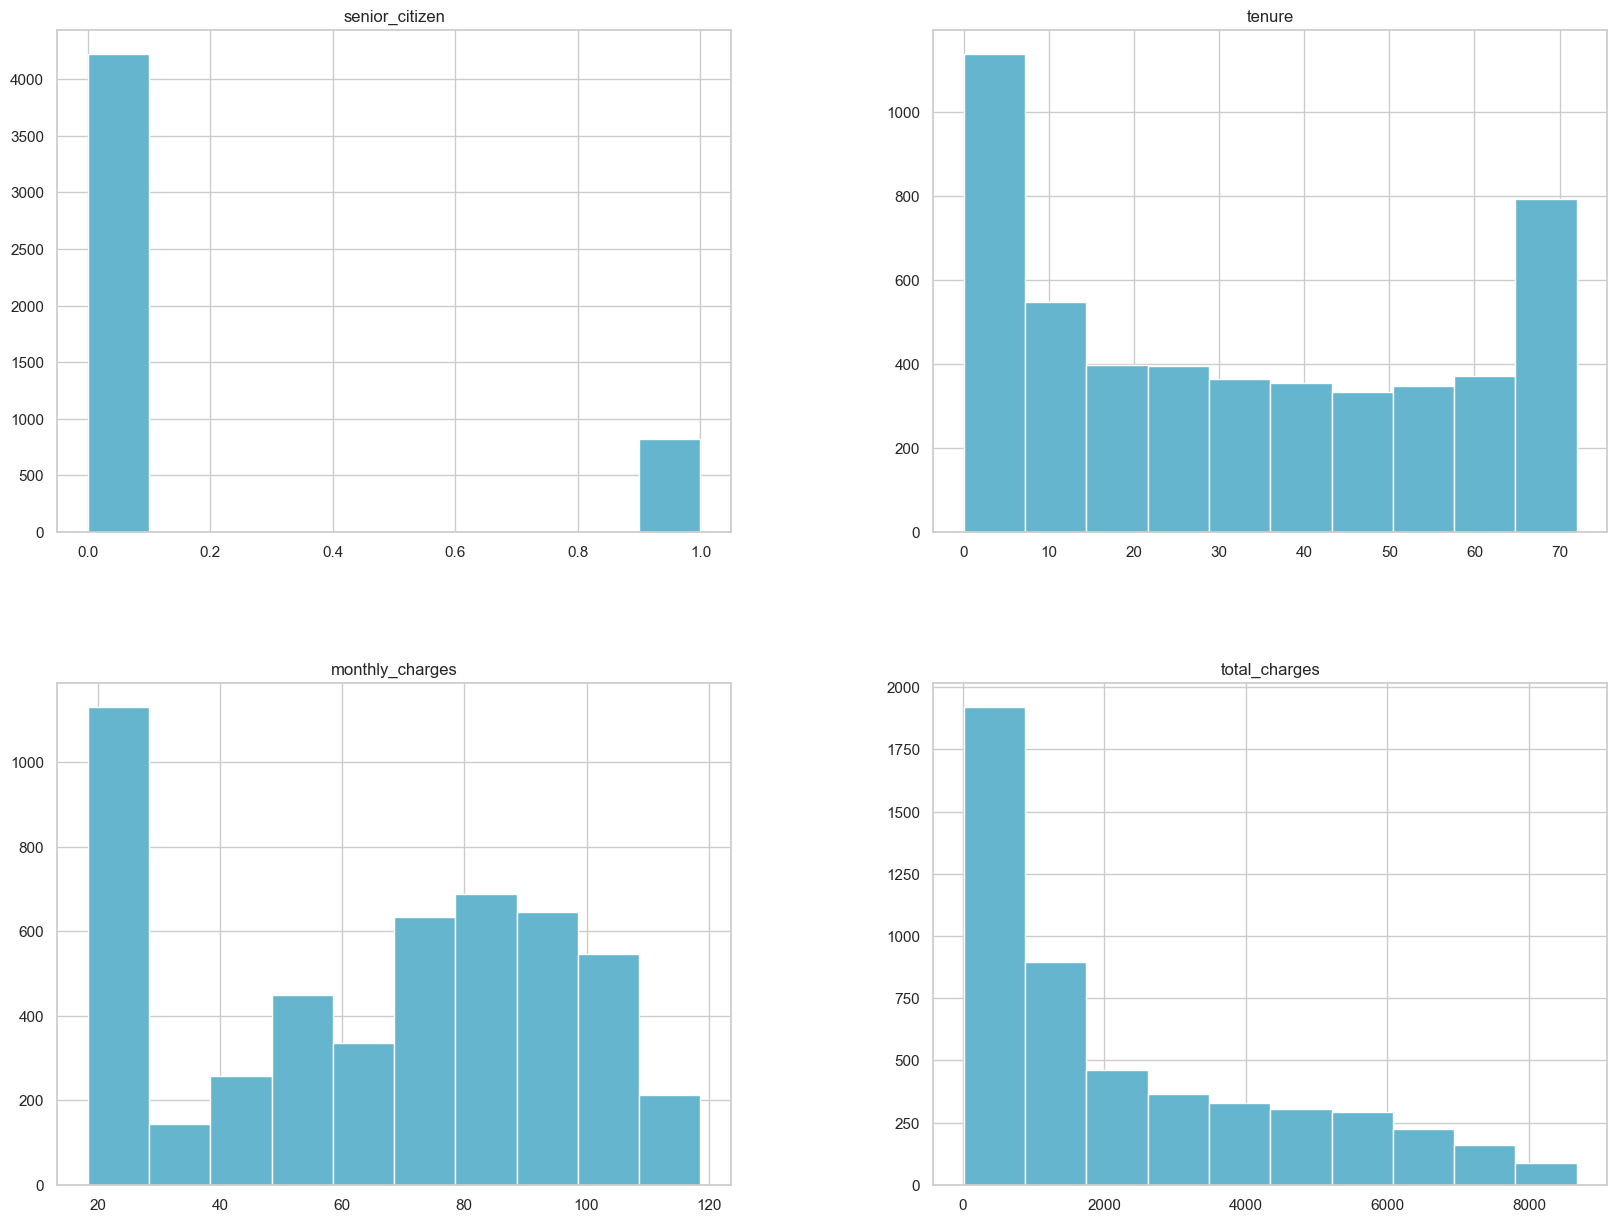

In [130]:
train_df.hist(figsize=(20, 15), color = 'c')
plt.show()

*Density plot*

<Axes: ylabel='Density'>

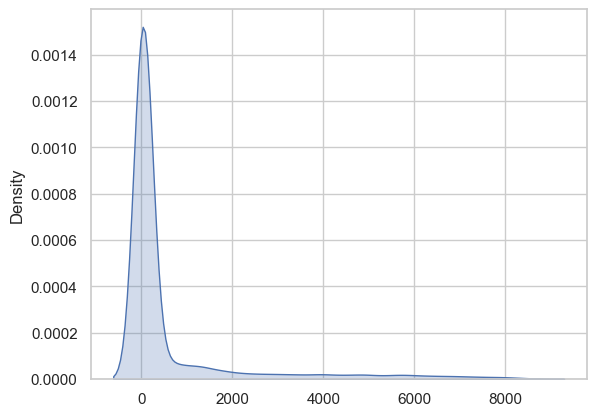

In [61]:
sns.kdeplot(train_df.drop(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn'], axis=1).values.ravel(), fill=True)

From the density plot it can concluded the data is positively skewed and does not followthe Gaussian distribution.

In [60]:
categoricals = train_df.select_dtypes('object').columns
categoricals

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn'],
      dtype='object')

In [59]:
train_df.drop(categoricals, axis=1).skew()

senior_citizen     1.831228
tenure             0.225132
monthly_charges   -0.238767
total_charges      0.946284
dtype: float64

### Checking for outliers

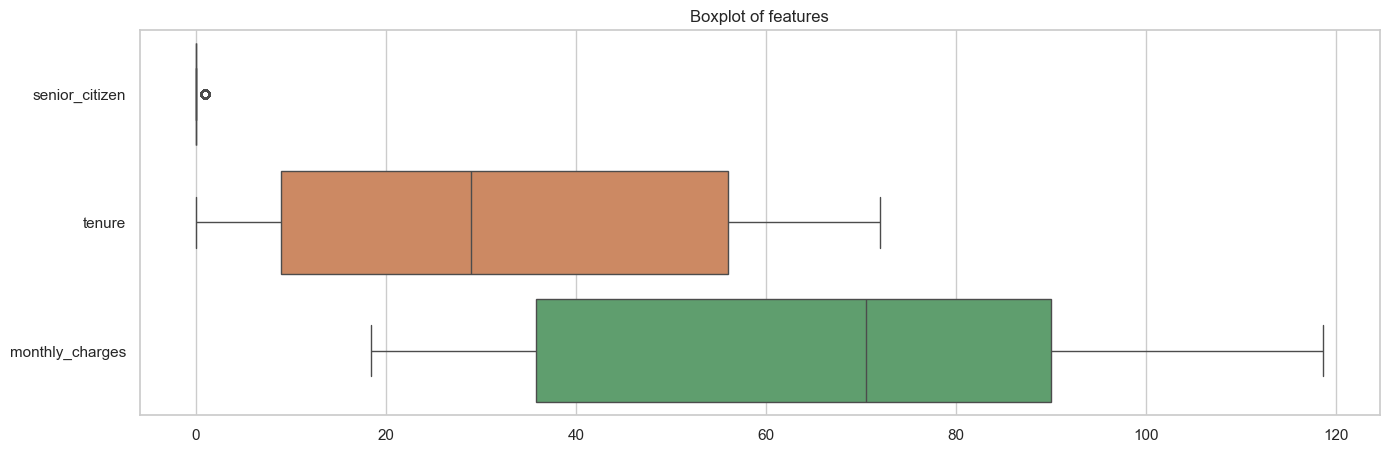

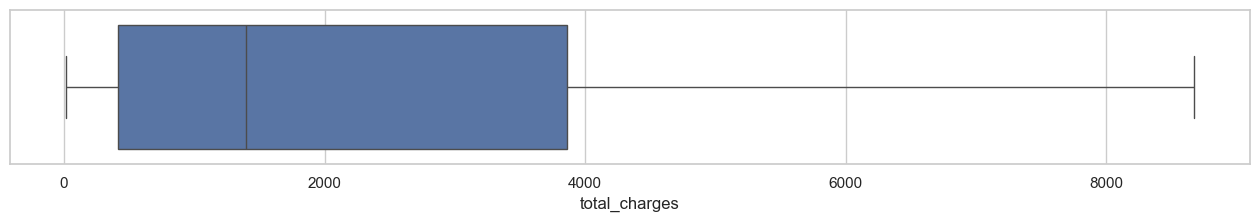

In [150]:
plt.figure(figsize=(16,5))
sns.boxplot(train_df.drop(['total_charges'], axis=1), orient='h')
plt.title('Boxplot of features')


plt.figure(figsize=(16,2))
sns.boxplot(train_df['total_charges'], orient='h')
plt.show()


**Key Insights**

- The column 'total_charges' was dropped from the first cell due to the contrasting range from the other numerical values and in turn, dwarfing them. It is checked in a separate cell for outliers.

- Overall, there seem to be no evident outliers in the numerical columns. There is an apparent outlier in the senior citizen simply because there are only two values 0 and 1 and 0 dominates.

- From the results, the columns positively skewed are:
  - 'senior citizen' with a high skewness of 183%
  - 'tenure'  having only 23%
  - 'total charges' of 95%

    whereas the negatively skewed column is:
  - 'monthly charges' of only 24%

- The entire dataset has a positive skewness

This will help determine how values will be imputed for missing values in data preparation.

*Countplots*

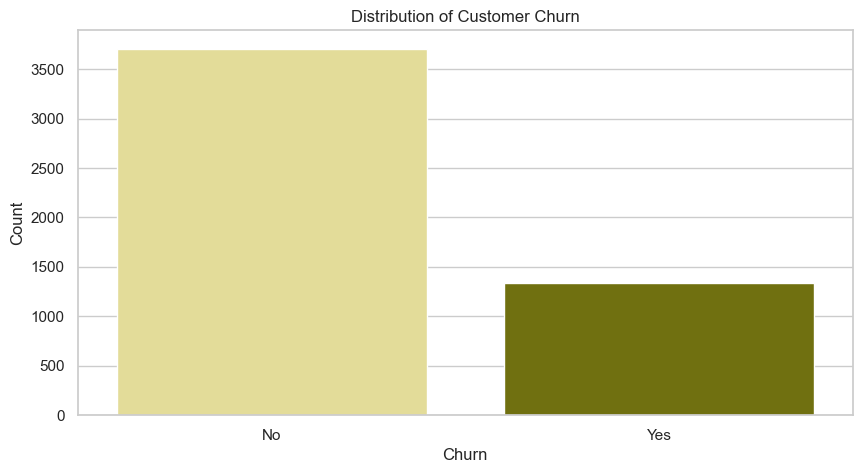

In [121]:
plt.figure(figsize =(10,5))


sns.countplot(x='churn', data=train_df, palette={'No': 'khaki', 'Yes': 'olive'})
plt.title("Distribution of Customer Churn")
plt.xlabel('Churn')
plt.ylabel('Count')





# Show the plot
plt.show()


*Pie chart*

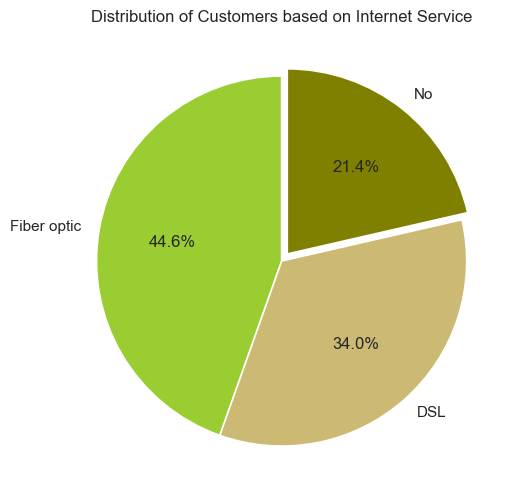

In [124]:
# # Ananlyze the InternetService column
plt.figure(figsize =(10,6))
colors = ['yellowgreen', 'y', 'olive']
plt.pie(x=train_df['internet_service'].value_counts().values,labels=train_df['internet_service'].value_counts().index, autopct='%.1f%%',
        startangle=90, explode=(0.001,0.001,0.05) ,colors=colors)
plt.title('Distribution of Customers based on Internet Service')
plt.show()

#### Bivariate Analysis

Note: Some of these analysis will be answered in the analytical questions below.

In [37]:
# Relationship between numeric columns
train_df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,senior_citizen,tenure,monthly_charges,total_charges
senior_citizen,1.000000,0.004597,0.221780,0.095463
tenure,0.004597,1.000000,0.240645,0.825839
monthly_charges,0.221780,0.240645,1.000000,0.646828
total_charges,0.095463,0.825839,0.646828,1.000000


The correlation matrix for the numeric features shows a high positive correlation between the following features:
- monthly charges and total charges as if one pays more monthly charges, the more amount which be accountable in total charges and vice versa.
- tenure and total charges which is to be expected because the longer one stays, the cumulative monthly charges increase and in effect, so do the total charges.

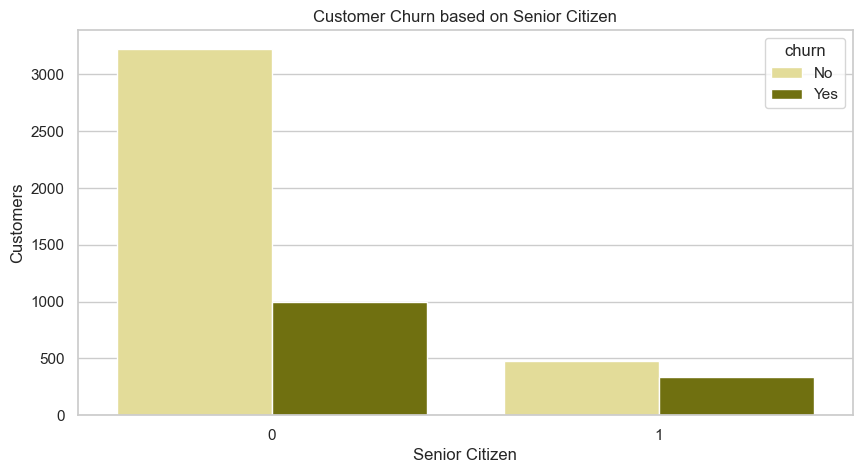

In [125]:
# Relationship between Churn and senior citizens
plt.figure(figsize =(10,5))
sns.countplot(data=train_df, x='senior_citizen',hue='churn', palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()


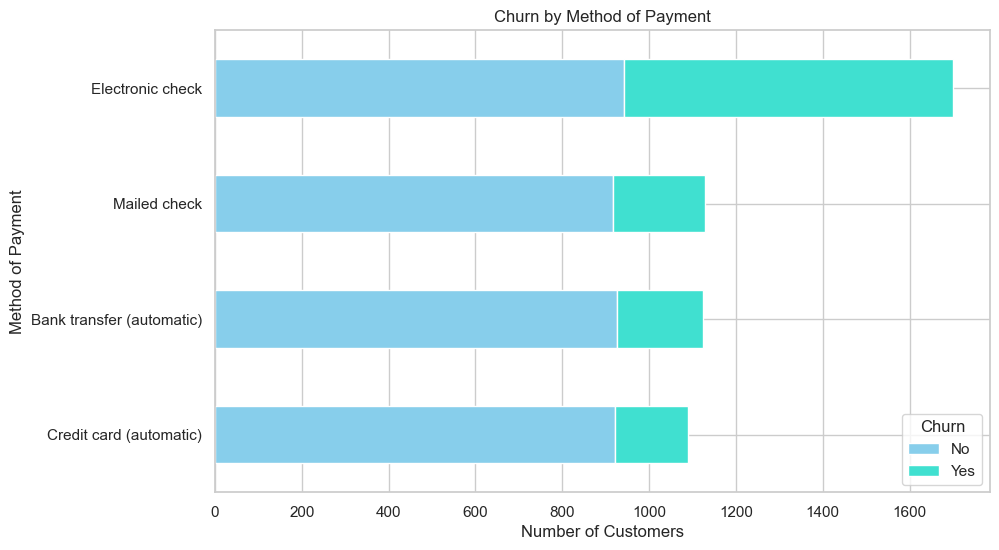

In [149]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['payment_method', 'churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color={'No': 'skyblue', 'Yes': 'turquoise'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Method of Payment')
plt.title('Churn by Method of Payment')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

#### **Key Insights**
***Genders*** : male customers are slightly higher than female customrs.

***Partner***: Customers with or without partners are about the same.

***Dependents*** : Seems we have more customers without dependent members than those who have.

***PhoneService*** : Also the majority of customers who don't have a phone service are way more than those who have.

***InternetService*** : Customers who have internet service, prefer mostly DSL or Fiber optic.

***MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport*** : There is a common pattern in these features indicating that most of the customers prefer not to have access to these features than those who do.

***StreamingMovies and StreamingTV***  have similar barplots, which means there is an equal amount of customers who prefer to either have or not have these services.

***Contract*** : In general customers prefer month-to-month contracts compared to other types such as two year or one year contracts.

***PaperlessBilling*** :  most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority



### Answering analytical questions

Q1 
- How do different levels of monthly customer charges impact customer churn rates? Are there specific price points where churn tends to increase significantly? Can we identify an optimal pricing range that minimizes churn while maximizing revenue?


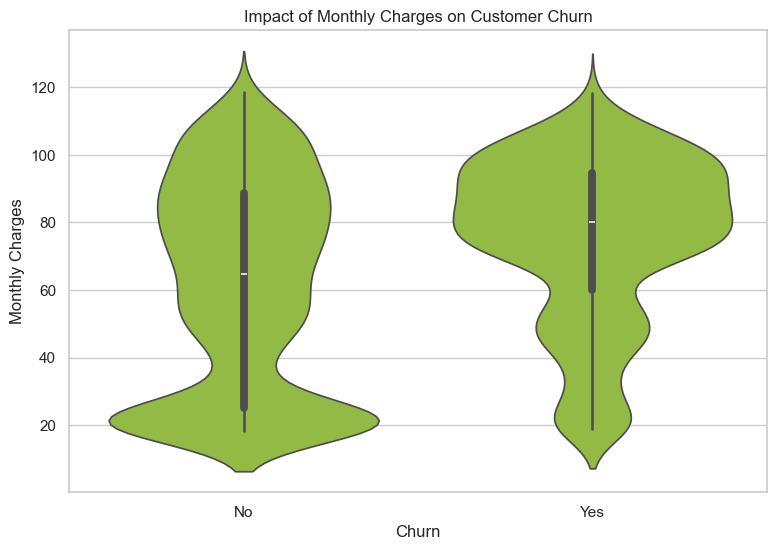

In [129]:
# Relationship beyween Customer Churn and Monthly charges
plt.figure(figsize=(9,6))
sns.violinplot(data=train_df,x='churn',y='monthly_charges', color = 'yellowgreen' )
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly Charges on Customer Churn')
plt.show()

From the violin plot analysis, it is safe to say that from the yes churn perspective, the bulk of customers who leave pay the monthly charge between the range $80 - $100 whereas from the no churn perspective, the bulk of customers who stay have the density of $20 - $30. 

There is quite an amount of variance in the yes violin plot as compared to the no violin plot

This translates further to say these customers leaving are probably due to the high monthly charges. In the No violin plot, there are also customers in the same range of substantial density that also stay and this could be due to other services they get included which will have to be investigated further down the analysis.

Q2

Is there a correlation between higher monthly charges and improved service quality (e.g., better internet speed, enhanced customer support)?
Do customers who pay more tend to stay longer due to better service experiences?
How can we enhance service quality to retain high-paying customers?

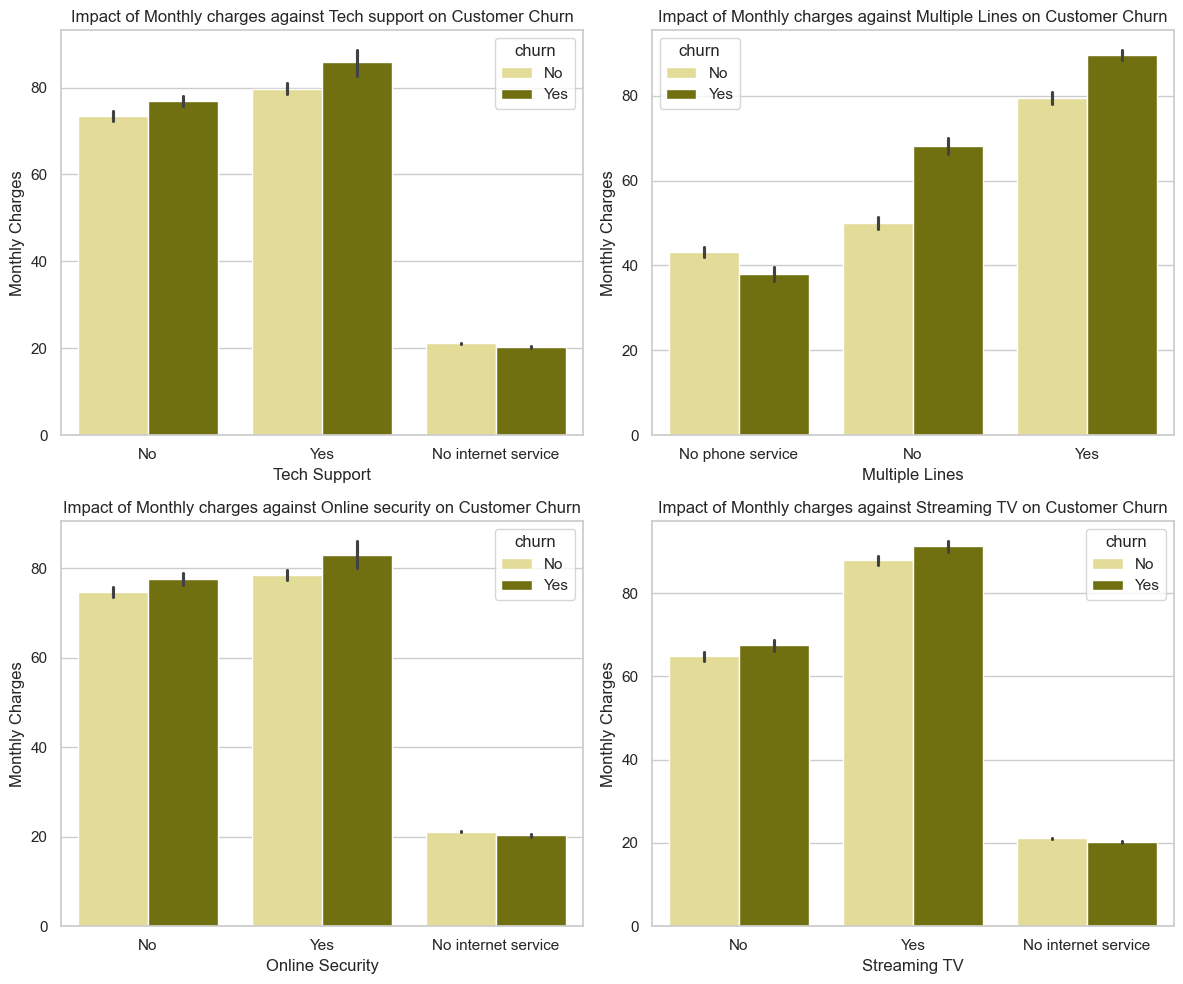

In [151]:


# Create a 2x2 grid for subplots
plt.figure(figsize=(12, 10))


# Plot the first visualization in the first subplot
plt.subplot(2, 2, 1)
sns.barplot(data=train_df, x='tech_support', y='monthly_charges', hue='churn',  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Tech Support')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Tech support on Customer Churn')

# Plot the second visualization in the second subplot
plt.subplot(2, 2, 2)
sns.barplot(data=train_df, x='multiple_lines', y='monthly_charges', hue='churn', palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Multiple Lines')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Multiple Lines on Customer Churn')

# Plot the third visualization in the third subplot
plt.subplot(2, 2, 3)
sns.barplot(data=train_df, x="online_security", y="monthly_charges", hue="churn",  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Online Security')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Online security on Customer Churn')

# Plot the fourth visualization in the third subplot
plt.subplot(2, 2, 4)
sns.barplot(data=train_df, x="streaming_tv", y="monthly_charges", hue="churn",  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Streaming TV')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Streaming TV on Customer Churn')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### **Key Insights**
***Genders*** : male customers are slightly higher than female customrs.

***Partner***: Customers with or without partners are about the same.

***Dependents*** : Seems we have more customers without dependent members than those who have.

***PhoneService*** : Also the majority of customers who don't have a phone service are way more than those who have.

***InternetService*** : Customers who have internet service, prefer mostly DSL or Fiber optic.

***MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport*** : There is a common pattern in these features indicating that most of the customers prefer not to have access to these features than those who do.

***StreamingMovies and StreamingTV***  have similar barplots, which means there is an equal amount of customers who prefer to either have or not have these services.



***PaperlessBilling*** :  most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority



Q3



Are customers on longer-term contracts (e.g., annual contracts) less likely to churn compared to those on month-to-month plans?



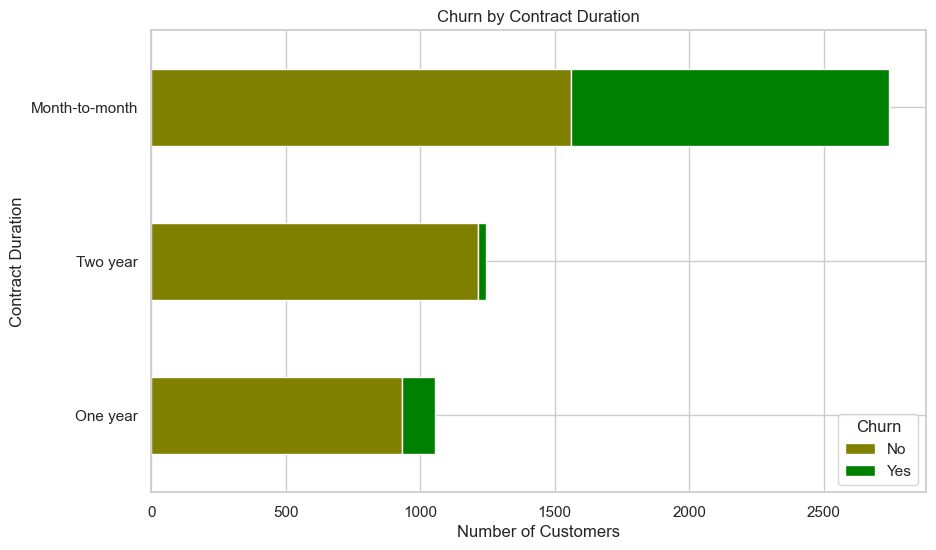

In [144]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['contract', 'churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color={'No': 'olive', 'Yes': 'green'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Contract Duration')
plt.title('Churn by Contract Duration')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

***Contract*** : In general customers prefer month-to-month contracts compared to other types such as two year or one year contracts.

Q4

How does the relationship between monthly charges and churn differ based on contract duration? Can we encourage customers to opt for longer contracts to reduce churn?

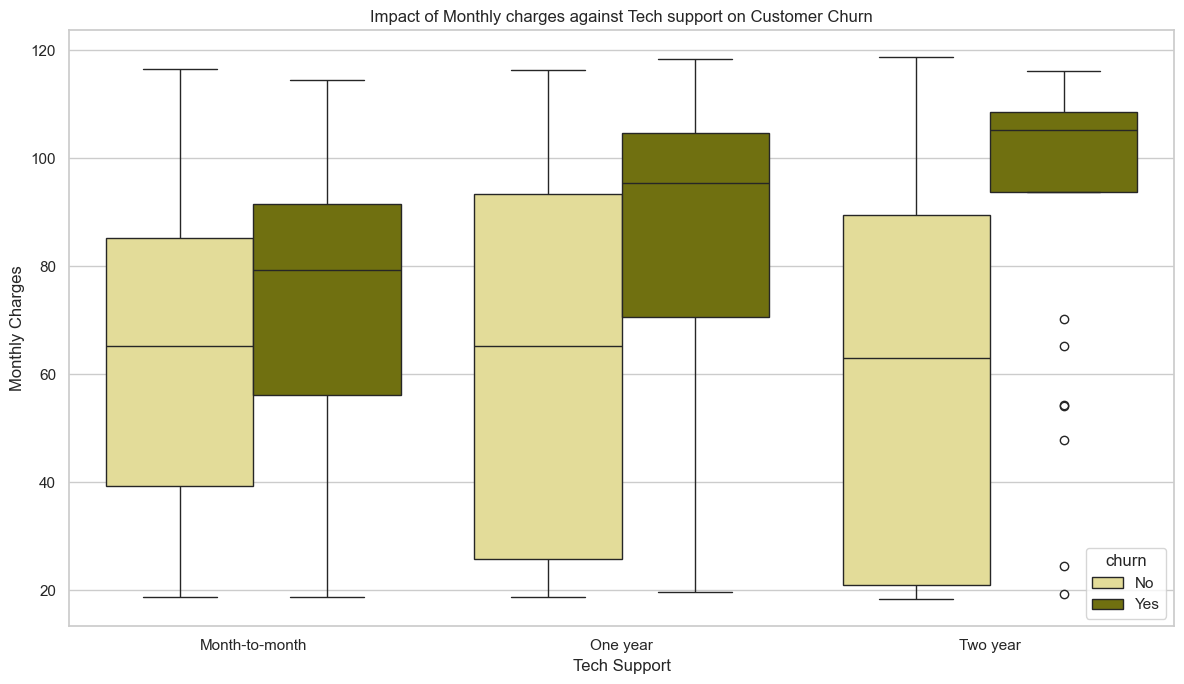

In [89]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='contract',y='monthly_charges', hue='churn',  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Tech Support')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Tech support on Customer Churn')
plt.tight_layout()
plt.show()

Q5

Does the amount of time spent being a customer have a relationship with the probability of churning by gender?

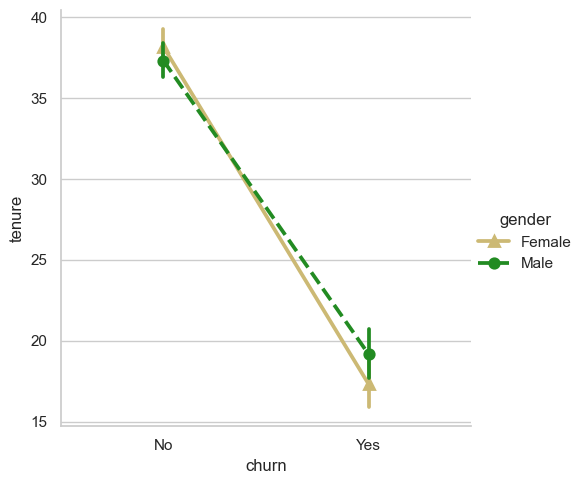

In [40]:
sns.catplot(
    data=train_df, x="churn", y="tenure", hue="gender",
    palette={"Male": "forestgreen", "Female": "y"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

Q6

Does one's total charges over the year increase as expected or is there a trend of discount for loyal customers?

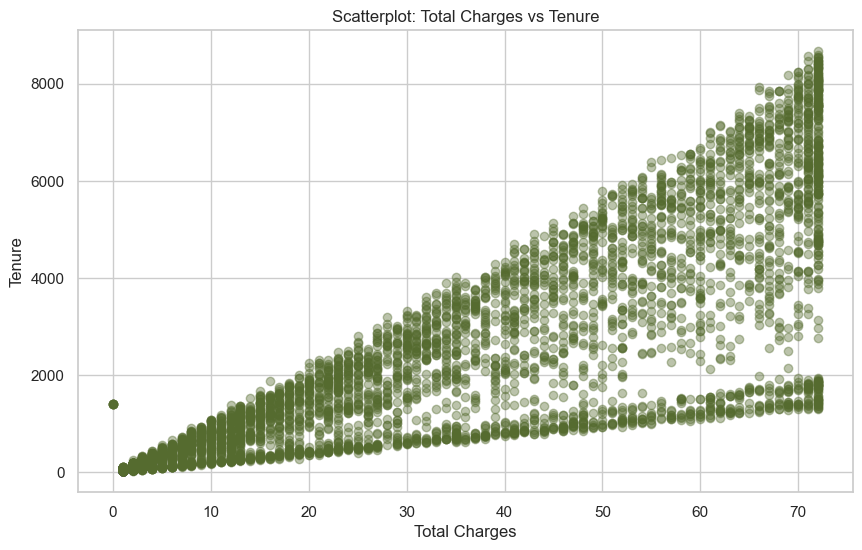

In [127]:
# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['tenure'], train_df['total_charges'], alpha=0.4, color='darkolivegreen')

# Adding labels and title
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Scatterplot: Total Charges vs Tenure')

# Show plot
#plt.grid(True)
plt.show()


### Hypothesis testing


**Null Hypothesis(H0)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

**Alternative hypothesis(H1)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn. 

#### Since the distribution is not normal from the viusalisations, the test method used was Wilcoxon rank-sum test

In [136]:
# Split the data into two groups based on churn status
churned_yes = train_df[train_df['churn'] == 'Yes']['monthly_charges']
churned_no = train_df[train_df['churn'] == 'No']['monthly_charges']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_yes, churned_no, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant relationship between the amount of monthly customer charges and customer churn.")
else:
    print("Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.")


Mann-Whitney U statistic: 3100791.0
P-value: 1.2019873209608733e-42
Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.


## Data Preparation

In [138]:


# Compute the Phi-K correlation matrix
phik_matrix = train_df.drop('customer_id',axis=1).phik_matrix()

# Print the Phi-K correlation matrix
print("Phi-K Correlation Matrix:")
print(phik_matrix)

interval columns not set, guessing: ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
Phi-K Correlation Matrix:
                     gender  senior_citizen   partner  dependents    tenure  \
gender             1.000000        0.000000  0.000000    0.013919  0.020282   
senior_citizen     0.000000        1.000000  0.032588    0.332656  0.028254   
partner            0.000000        0.032588  1.000000    0.660713  0.471292   
dependents         0.013919        0.332656  0.660713    1.000000  0.224955   
tenure             0.020282        0.028254  0.471292    0.224955  1.000000   
phone_service      0.000000        0.000000  0.000000    0.000000  0.000000   
multiple_lines     0.000000        0.079744  0.084249    0.009377  0.377305   
internet_service   0.002392        0.162048  0.000000    0.107357  0.017208   
online_security    0.003063        0.128196  0.086853    0.116573  0.362191   
online_backup      0.000000        0.109796  0.088165    0.094783  0.400946   
devi

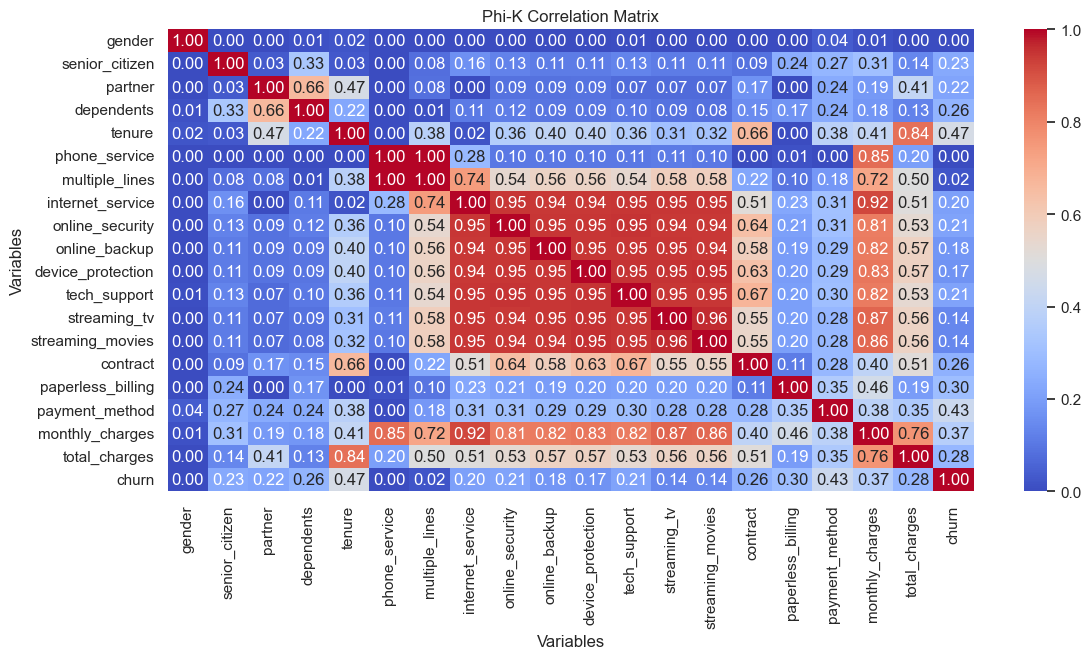

In [142]:
# Plot the heatmap of the Phi-K correlation matrix
plt.figure(figsize=(13, 6))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phi-K Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

From the Phi-K matrix, the features most important for data modelling are:

- Tenure

- Payment method

- Monthly charges

- Paperless billing

- Dependents

- Contracts

- Total Charges



The features were then further investigated for multicollinearity. The following were flagged:

- Tenure and total charges with a correlation coefficient of 0.84
- Total charges and monthly charges with a correlation coefficient of 0.76

It was very interesting to observe that monthly charges were highly correlated with "luxury" services.


##### Action to take

- Exclude totalcharges from the data modeling
- Drop the other columns not identified significant for modeling

## Checking for data balance

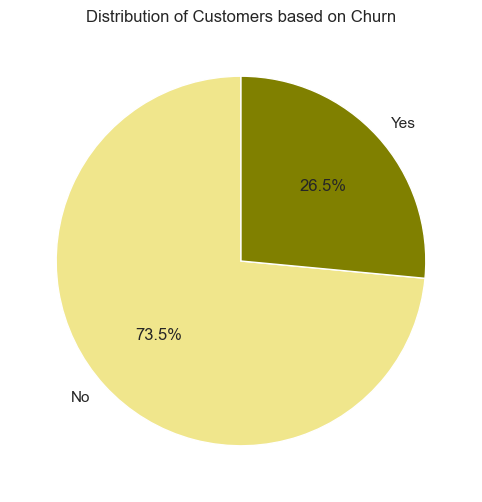

In [132]:
#checking if the churn column is unbalanced
plt.figure(figsize =(10,6))
colors = [ 'khaki', 'olive']
plt.pie(x=train_df['churn'].value_counts().values,labels=train_df['churn'].value_counts().index, autopct='%.1f%%',
        startangle=90,colors=colors)
plt.title('Distribution of Customers based on Churn')
plt.show()

In [135]:
# Ananlyze the Churn column

train_df["churn"].value_counts()

churn
No     3707
Yes    1336
Name: count, dtype: int64

Upsampling

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()